<a href="https://colab.research.google.com/github/AabidMK/RealtyAI_Infosys_Internship_Aug2025/blob/Sarayu-Narra/FinalDataSet_Infosys_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import spacy
from spacy.matcher import Matcher

In [ ]:
df = pd.read_csv("/content/Real Estate Data V21.csv.zip")   # change filename if needed

print(df.head())   # check first few rows
print(df.columns)  # check column names

                                      Name  \
0                         Casagrand ECR 14   
1    Ramanathan Nagar, Pozhichalur,Chennai   
2                              DAC Prapthi   
3  Naveenilaya,Chepauk, Triplicane,Chennai   
4                 VGN Spring Field Phase 1   

                                      Property Title     Price  \
0  4 BHK Flat for sale in Kanathur Reddikuppam, C...  ₹1.99 Cr   
1  10 BHK Independent House for sale in Pozhichal...  ₹2.25 Cr   
2      3 BHK Flat for sale in West Tambaram, Chennai   ₹1.0 Cr   
3  7 BHK Independent House for sale in Triplicane...  ₹3.33 Cr   
4              2 BHK Flat for sale in Avadi, Chennai   ₹48.0 L   

                                   Location  Total_Area  Price_per_SQFT  \
0             Kanathur Reddikuppam, Chennai        2583          7700.0   
1     Ramanathan Nagar, Pozhichalur,Chennai        7000          3210.0   
2  Kasthuribai Nagar, West Tambaram,Chennai        1320          7580.0   
3   Naveenilaya,Chepauk, T

In [ ]:
# Load English NLP model
nlp = spacy.load("en_core_web_sm")

# Create spaCy matcher
matcher = Matcher(nlp.vocab)

# Define patterns (number + word)
pattern_bhk = [{"IS_DIGIT": True}, {"LOWER": {"IN": ["bhk", "bedroom", "bedrooms"]}}]
pattern_bath = [{"IS_DIGIT": True}, {"LOWER": {"IN": ["bath", "baths", "bathroom", "bathrooms"]}}]
pattern_sqft = [{"IS_DIGIT": True}, {"LOWER": {"IN": ["sqft", "sq.ft"]}}]

matcher.add("BHK", [pattern_bhk])
matcher.add("BATH", [pattern_bath])
matcher.add("SQFT", [pattern_sqft])

In [ ]:
def extract_features(text):
    if pd.isnull(text):  # handle missing descriptions
        return None, None, None

    doc = nlp(text)
    matches = matcher(doc)

    rooms, baths, area = None, None, None

    for match_id, start, end in matches:
        span = doc[start:end]
        label = nlp.vocab.strings[match_id]

        if label == "BHK":
            rooms = int(span[0].text)
        elif label == "BATH":
            baths = int(span[0].text)
        elif label == "SQFT":
            area = int(span[0].text)

    return rooms, baths, area

In [ ]:
df[["rooms", "bathrooms", "area_sqft"]] = df["Description"].apply(lambda x: pd.Series(extract_features(x)))

In [ ]:
print(df[["Description", "rooms", "bathrooms", "area_sqft"]].head(20))

                                          Description  rooms  bathrooms  \
0   Best 4 BHK Apartment for modern-day lifestyle ...    4.0        4.0   
1   Looking for a 10 BHK Independent House for sal...   10.0        9.0   
2   Property for sale in Tambaram, Chennai. This 3...    3.0        2.0   
3   Entire Building for sale with 7 units of singl...    7.0        NaN   
4   Property for sale in Avadi, Chennai. This 2 BH...    2.0        2.0   
5   Price negotiable. Big hall, big balcony, gated...    2.0        NaN   
6   2 BHK Apartment for sale in Chennai. This prop...    2.0        NaN   
7   A 3 BHK Independent House for sale in Mahindra...    3.0        3.0   
8   Check out this 2 BHK Apartment for sale in Tam...    2.0        NaN   
9   We are the proud owners of this 1 bhk apartmen...    1.0        NaN   
10  A 1 BHK Apartment for sale in Mahindra World C...    1.0        1.0   
11  Looking for a 3 BHK Apartment for sale in Chen...    3.0        3.0   
12  Looking for a 6 BHK V

EDA ON THE DATASET

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/Real Estate Data V21.csv.zip")

In [ ]:
print(df.head())      # first 5 rows
print(df.info())      # datatypes, missing values
print(df.describe())  # summary statistics (mean, min, max, etc.)
print(df.isnull().sum())  # count of missing values per column
print(df.columns)

                                      Name  \
0                         Casagrand ECR 14   
1    Ramanathan Nagar, Pozhichalur,Chennai   
2                              DAC Prapthi   
3  Naveenilaya,Chepauk, Triplicane,Chennai   
4                 VGN Spring Field Phase 1   

                                      Property Title     Price  \
0  4 BHK Flat for sale in Kanathur Reddikuppam, C...  ₹1.99 Cr   
1  10 BHK Independent House for sale in Pozhichal...  ₹2.25 Cr   
2      3 BHK Flat for sale in West Tambaram, Chennai   ₹1.0 Cr   
3  7 BHK Independent House for sale in Triplicane...  ₹3.33 Cr   
4              2 BHK Flat for sale in Avadi, Chennai   ₹48.0 L   

                                   Location  Total_Area  Price_per_SQFT  \
0             Kanathur Reddikuppam, Chennai        2583          7700.0   
1     Ramanathan Nagar, Pozhichalur,Chennai        7000          3210.0   
2  Kasthuribai Nagar, West Tambaram,Chennai        1320          7580.0   
3   Naveenilaya,Chepauk, T

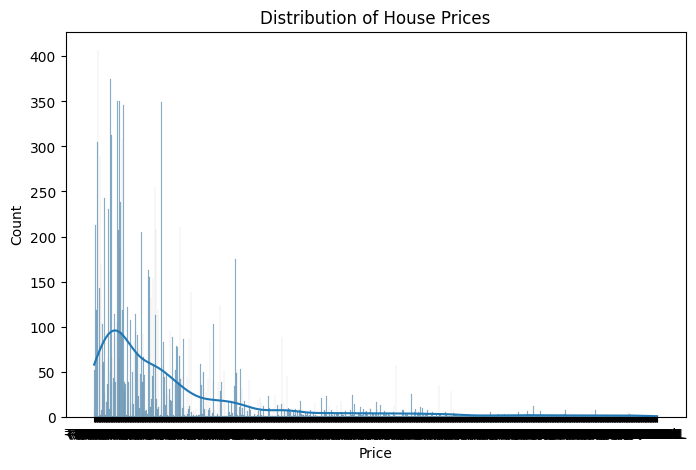

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df["Price"], bins=50, kde=True)
plt.title("Distribution of House Prices")
plt.show()

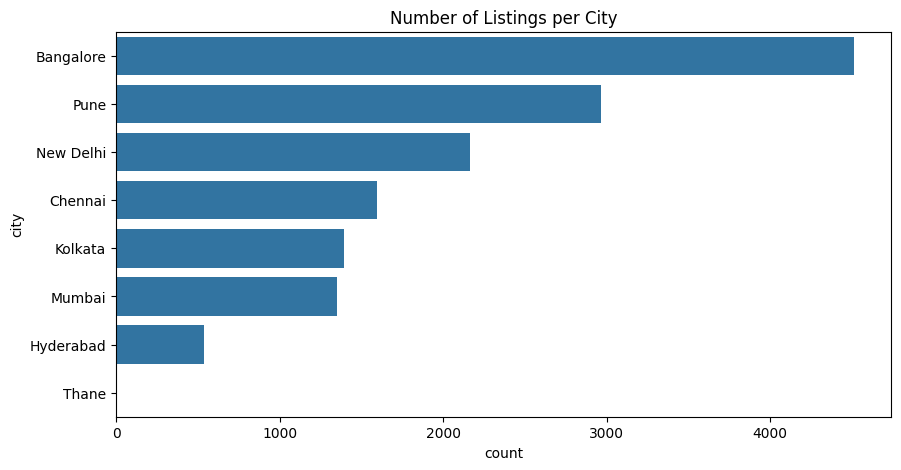

In [ ]:
# Extract city from location (last word after comma)
df["city"] = df["Location"].str.split(",").str[-1].str.strip()
plt.figure(figsize=(10,5))
sns.countplot(y="city", data=df, order=df["city"].value_counts().index)
plt.title("Number of Listings per City")
plt.show()

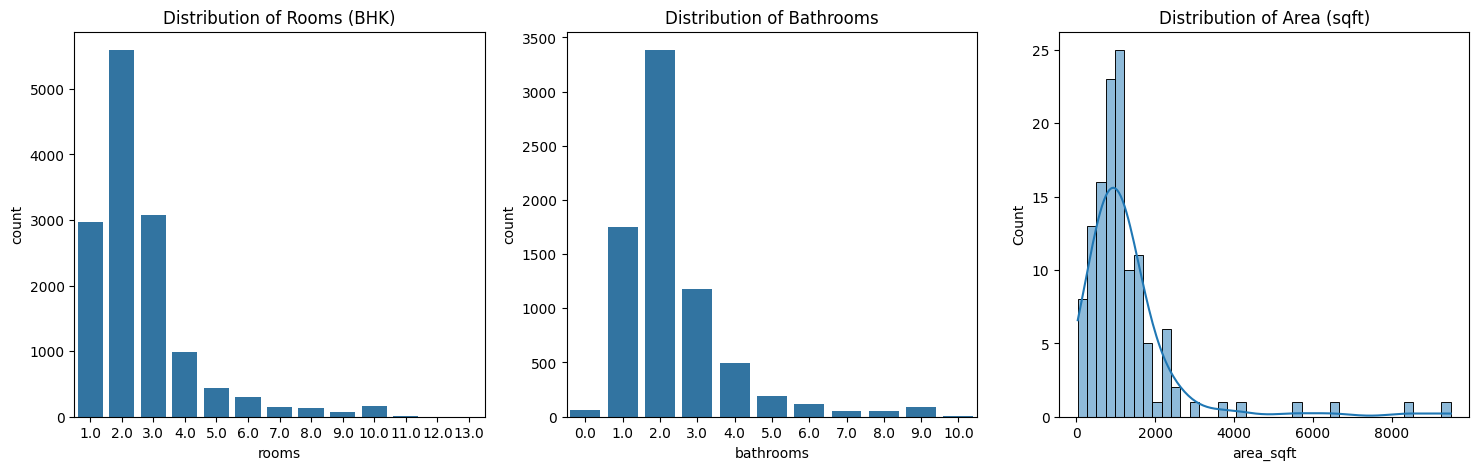

In [ ]:
# Load English NLP model
nlp = spacy.load("en_core_web_sm")

# Create spaCy matcher
matcher = Matcher(nlp.vocab)

# Define patterns (number + word)
pattern_bhk = [{"IS_DIGIT": True}, {"LOWER": {"IN": ["bhk", "bedroom", "bedrooms"]}}]
pattern_bath = [{"IS_DIGIT": True}, {"LOWER": {"IN": ["bath", "baths", "bathroom", "bathrooms"]}}]
pattern_sqft = [{"IS_DIGIT": True}, {"LOWER": {"IN": ["sqft", "sq.ft"]}}]

matcher.add("BHK", [pattern_bhk])
matcher.add("BATH", [pattern_bath])
matcher.add("SQFT", [pattern_sqft])

def extract_features(text):
    if pd.isnull(text):  # handle missing descriptions
        return None, None, None

    doc = nlp(text)
    matches = matcher(doc)

    rooms, baths, area = None, None, None

    for match_id, start, end in matches:
        span = doc[start:end]
        label = nlp.vocab.strings[match_id]

        if label == "BHK":
            rooms = int(span[0].text)
        elif label == "BATH":
            baths = int(span[0].text)
        elif label == "SQFT":
            area = int(span[0].text)

    return rooms, baths, area

df[["rooms", "bathrooms", "area_sqft"]] = df["Description"].apply(lambda x: pd.Series(extract_features(x)))



fig, axes = plt.subplots(1, 3, figsize=(18,5))

sns.countplot(x="rooms", data=df, ax=axes[0])
axes[0].set_title("Distribution of Rooms (BHK)")

sns.countplot(x="bathrooms", data=df, ax=axes[1])
axes[1].set_title("Distribution of Bathrooms")

sns.histplot(df["area_sqft"], bins=40, kde=True, ax=axes[2])
axes[2].set_title("Distribution of Area (sqft)")

plt.show()

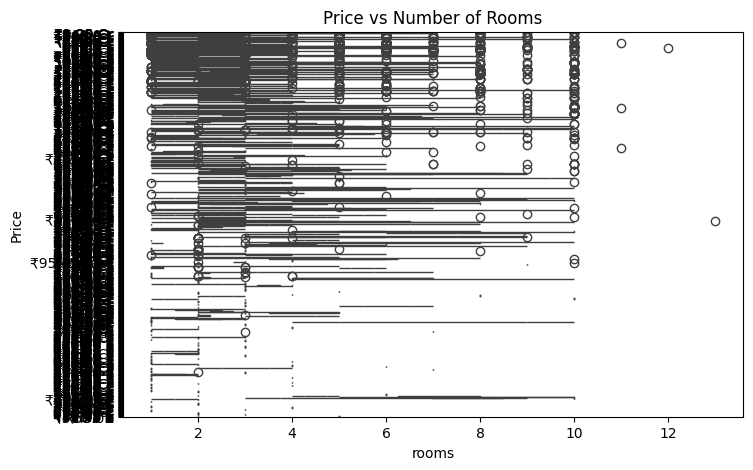

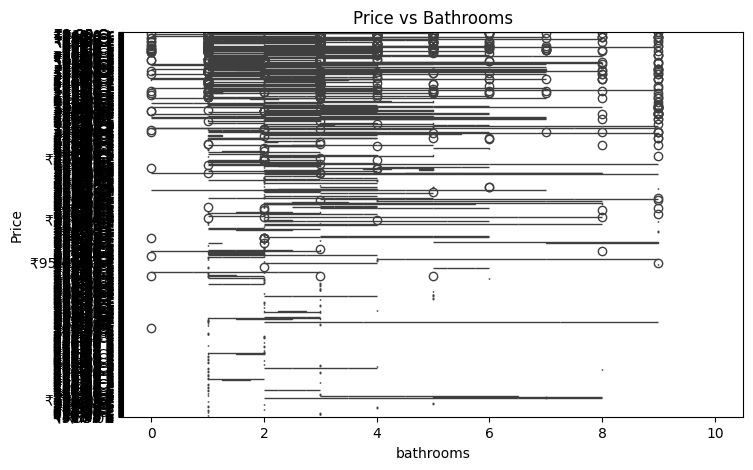

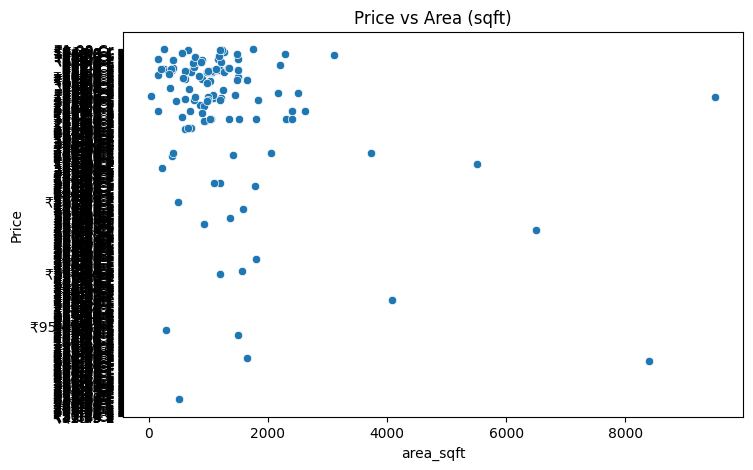

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x="rooms", y="Price", data=df)
plt.title("Price vs Number of Rooms")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x="bathrooms", y="Price", data=df)
plt.title("Price vs Bathrooms")
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x="area_sqft", y="Price", data=df)
plt.title("Price vs Area (sqft)")
plt.show()

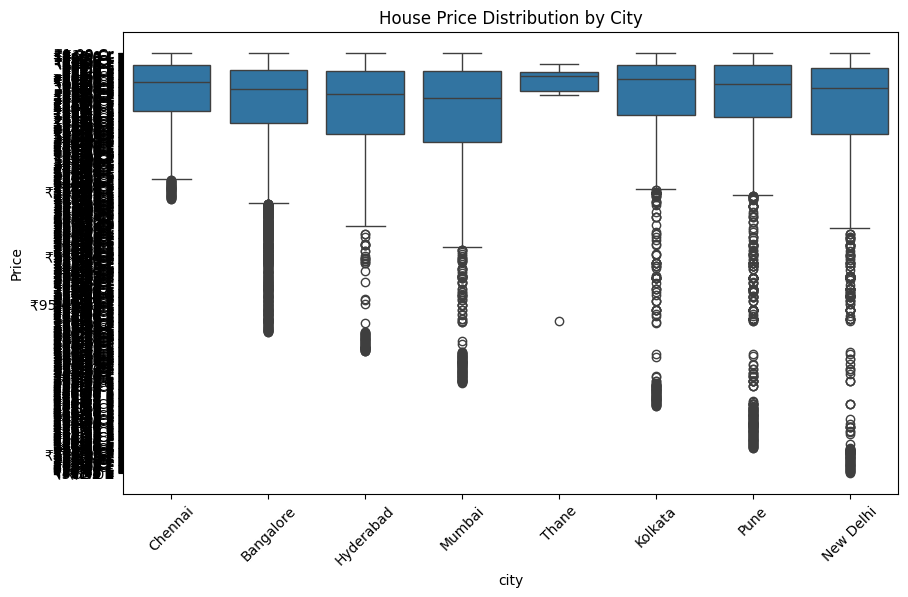

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="city", y="Price", data=df)
plt.xticks(rotation=45)
plt.title("House Price Distribution by City")
plt.show()